<a href="https://colab.research.google.com/github/aline-pacheco/testeBIOO/blob/main/Aline_Pacheco_Teste_BIOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###importando o dataframe



In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving samples.csv to samples (1).csv


In [ ]:
import io
amostras = pd.read_csv(io.BytesIO(uploaded['samples.csv']),skipinitialspace=True)

In [ ]:
amostras

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow up...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


### Quantos casos temos?

In [ ]:
amostras.shape

(4999, 6)



> Com a prévia do dataframe e também com a função shape, vemos que temos 4999 amostras/casos.



### Tem casos com colunas vazias? Elimine eles e indique quantos casos ficaram

In [ ]:
amostras_sem_faltantes = amostras.dropna()

In [ ]:
amostras_sem_faltantes.reset_index(drop=True)
amostras_sem_faltantes.shape

(3813, 6)



> Excluindo os valores faltantes, temos 3813 casos



###Quantos casos são de cirurgia e não cirurgia?


In [ ]:
amostras_sem_faltantes.groupby(['medical_specialty']).count()

,Unnamed: 0,description,sample_name,transcription,keywords
medical_specialty,,,,,
Allergy / Immunology,3,3,3,3,3
Bariatrics,18,18,18,18,18
Cardiovascular / Pulmonary,276,276,276,276,276
Chiropractic,4,4,4,4,4
Consult - History and Phy.,219,219,219,219,219
Cosmetic / Plastic Surgery,25,25,25,25,25
Dentistry,24,24,24,24,24
Dermatology,24,24,24,24,24
Diets and Nutritions,10,10,10,10,10


Vemos que são 1007 casos em 'surgery', mas também temos a categoria 'bariatrics', 'plastic surgery' e 'neurosugery' que podemos incluir e juntos somam 1129 casos. 


In [ ]:
amostras_sem_faltantes.query('medical_specialty != "Surgery" ')

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4984,4984,Patient suffered from morbid obesity for many ...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr..."
4985,4985,Patient presented to the Bariatric Surgery Ser...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem..."
4989,4989,Evaluation for elective surgical weight loss v...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative str...","bariatrics, elective surgical weight loss, sur..."
4993,4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"HISTORY:, A 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros..."


Sendo assim são 2684 casos de não-cirurgia


###Quantos casos temos por cada especialidade? 



In [ ]:
amostras_sem_faltantes['medical_specialty'].nunique()

39

Temos no total de 39 especialidades, temos:

In [ ]:
amostras_sem_faltantes['medical_specialty'].value_counts()

Surgery                          1007
Orthopedic                        296
Cardiovascular / Pulmonary        276
Radiology                         248
Consult - History and Phy.        219
Gastroenterology                  192
Neurology                         162
SOAP / Chart / Progress Notes     140
Urology                           139
General Medicine                  137
Obstetrics / Gynecology           128
ENT - Otolaryngology               83
Ophthalmology                      79
Neurosurgery                       79
Discharge Summary                  76
Nephrology                         63
Hematology - Oncology              60
Pain Management                    58
Podiatry                           42
Office Notes                       40
Pediatrics - Neonatal              38
Emergency Room Reports             29
Cosmetic / Plastic Surgery         25
Dermatology                        24
Dentistry                          24
Letters                            20
Psychiatry /

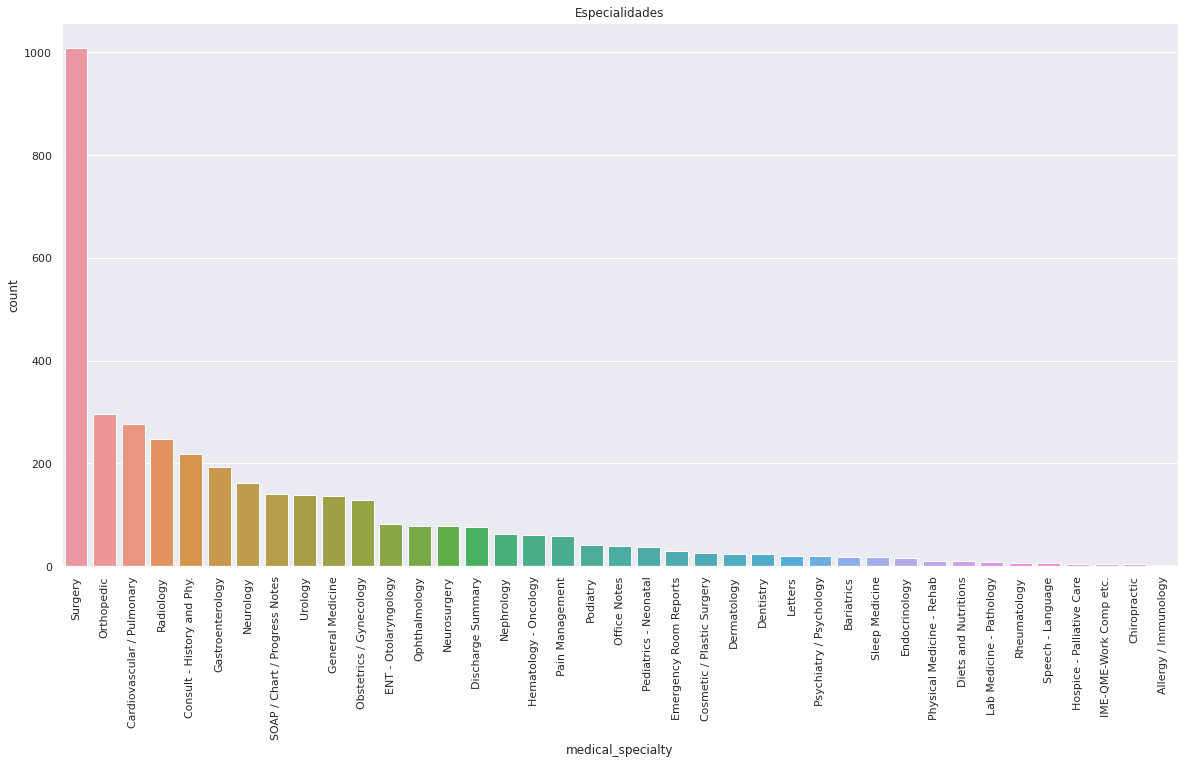

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(20,10))
ax = sns.countplot(x = 'medical_specialty', data=amostras_sem_faltantes, order= amostras_sem_faltantes['medical_specialty'].value_counts().index)
plt.xticks(rotation=90)
ax.set_title('Especialidades')
plt.show()

### Indicar para cada especialidade as sub-especialidades (coluna sample_name).

In [ ]:
especialidades= amostras_sem_faltantes.groupby(['medical_specialty','sample_name']).size().reset_index(name='counts')
especialidades.query('counts != 1')

,medical_specialty,sample_name,counts


Como para cada linha de Especialidade existe uma descrição em sub-especialidade (sample_name) e elas não se repetem dentro da mesma especialidade, então o número de sub-especialidades para cada especialidade é igual ao número de casos (em cada especialidade). Ou seja, a mesma informação obtida na pergunta anterior. 

No entanto, interessantemente, algumas sub-especialidades estão presentes em mais de uma especialidades:

In [ ]:
amostras_sem_faltantes.groupby(['sample_name','medical_specialty']).size().reset_index(name='counts')

,sample_name,medical_specialty,counts
0,"Arthroscopy, Arthrotomy, Bankart lesion repair",Orthopedic,1
1,"Arthroscopy, Arthrotomy, Bankart lesion repair",Surgery,1
2,"Arthroscopy, Meniscoplasty, & Chondroplasty",Orthopedic,1
3,"Arthroscopy, Meniscoplasty, & Chondroplasty",Surgery,1
4,"Browlift, Blepharoplasty, & Rhytidectomy",Cosmetic / Plastic Surgery,1
...,...,...,...
3808,Youngswick Osteotomy,Surgery,1
3809,de Quervain Release - Carpal,Orthopedic,1
3810,de Quervain Release - Carpal,Surgery,1
3811,de Quervain Release - Wrist,Orthopedic,1


###Quantos dos casos têm obesidade ('obesity')?

In [ ]:
df1 = amostras_sem_faltantes[amostras_sem_faltantes['description'].str.contains('obesity') | amostras_sem_faltantes['transcription'].str.contains('MIT') |amostras_sem_faltantes['keywords'].str.contains('obesity')]
df1

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
5,5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
10,10,Morbid obesity. Laparoscopic Roux-en-Y gastr...,Bariatrics,Laparoscopic Gastric Bypass - 1,"PREOPERATIVE DIAGNOSIS: , Morbid obesity. ,POS...","bariatrics, morbid obesity, roux-en-y, gastric..."
26,26,Hispanic male patient was admitted because of ...,Urology,Urology Discharge Summary,"PROCEDURES:, Cystourethroscopy and transurethr...","urology, tur, bun, cystourethroscopy, difficul..."
61,61,Patient presents to the Emergency Department w...,Urology,Penile Mass - Emergency Visit,"CHIEF COMPLAINT: , ""Bloody bump on penis."",HIS...","urology, bump on penis, bleeding bump, glans, ..."
69,69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,"CHIEF COMPLAINT: ,Penile cellulitis status po...","urology, newborn circumcision, suprapubic fat ..."
...,...,...,...,...,...,...
4956,4956,A critically ill 67-year-old with multiple med...,Cardiovascular / Pulmonary,Atrial Flutter - Progress Note,"HISTORY OF PRESENT ILLNESS: , Hospitalist foll...","cardiovascular / pulmonary, rapid ventricular ..."
4960,4960,Atrial fibrillation with rapid ventricular re...,Cardiovascular / Pulmonary,Atrial Fibrillation - SOAP,"SUBJECTIVE: , The patient states that she feel...","cardiovascular / pulmonary, ventricular tachyc..."
4977,4977,"Gentleman with long-standing morbid obesity, ...",Bariatrics,Gastric Bypass Discussion - 1,"HISTORY OF PRESENT ILLNESS: , In short, the pa...","bariatrics, medifast, medifast dieting, hypert..."
4984,4984,Patient suffered from morbid obesity for many ...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr..."




> Há 222 casos com ocorrência de 'obesity' registrado em algum momento (sejam na descrição, na transcrição ou nas palavras-chave).



###Quantos casos na especialidade de urologia ('urology') tiveram algum problema relacionado ao câncer de próstata ('prostate cancer')?

In [ ]:
uro = amostras_sem_faltantes.query('medical_specialty == "Urology"')

In [ ]:
pc = uro[uro['description'].str.contains('prostate cancer') | uro['transcription'].str.contains('prostate cancer') |uro['keywords'].str.contains('prostate cancer')]
pc.shape

(9, 6)



> 9 casos em Urologia tiveram alguma relação com câncer de próstata


###Dos que fizeram cirurgia, Quantos foram por algo relacionado a um problema gastrico?. Dica: Pode considerar palavras "gastric", "laparascopic", entre outras que você considerar são úteis e que possam ajudar a identificar esse tipo de casos. 

In [ ]:
ciru = amostras_sem_faltantes.query('medical_specialty == "Surgery"|  medical_specialty == "Bariatrics" ')

In [ ]:
gastrico = ciru[ciru['keywords'].str.contains('h. pylori')|ciru['keywords'].str.contains('gastric')|ciru['keywords'].str.contains('abdominal')|ciru['keywords'].str.contains('reflux') | ciru['keywords'].str.contains('laparoscopy')]
len(gastrico)

96

Podemos dizer que ao menos 96 casos tiveram relação com problemas gástricos

###Apresente as 100 palavras-chave mais usadas no total. 

In [ ]:
lista1= amostras_sem_faltantes['description'].tolist()
lista2= amostras_sem_faltantes['medical_specialty'].tolist()
lista3= amostras_sem_faltantes['sample_name'].tolist()
lista4 =amostras_sem_faltantes['transcription'].tolist()
lista5= amostras_sem_faltantes['keywords'].tolist()

In [ ]:
lista_total = lista1 + lista2 + lista3 + lista4 +lista5

In [ ]:
from collections import Counter
from nltk.corpus import stopwords # Import the stop word list

stop_words = set(stopwords.words('english'))
stop_words.update(['The',',','-','/','OF','A','This','also','year','old'])
palavras = ''.join(lista_total)
cont = Counter(w for w in palavras.split() if w not in stop_words)
most = Counter(cont).most_common()
most

[('patient', 14067),
 ('right', 7915),
 ('left', 7512),
 ('She', 5612),
 ('placed', 5313),
 ('There', 4206),
 ('He', 4059),
 ('well', 3189),
 ('No', 3123),
 ('using', 3075),
 ('I', 2987),
 ('used', 2907),
 ('incision', 2799),
 ('normal', 2760),
 ('without', 2393),
 ('anterior', 2342),
 ('skin', 2316),
 ('procedure', 2294),
 ('taken', 2293),
 ('history', 2136),
 ('room', 2128),
 ('closed', 1967),
 ('noted', 1922),
 ('operating', 1902),
 ('We', 1875),
 ('removed', 1853),
 ('lateral', 1849),
 ('upper', 1839),
 ('made', 1759),
 ('lower', 1738),
 ('posterior', 1734),
 ('artery', 1707),
 ('pain', 1685),
 ('blood', 1637),
 ('prepped', 1601),
 ('back', 1595),
 ('After', 1566),
 ('performed', 1547),
 ('sterile', 1543),
 ('distal', 1524),
 ('mg', 1517),
 ('area', 1514),
 ('DIAGNOSIS:', 1514),
 ('2', 1511),
 ('Vicryl', 1511),
 ('1', 1501),
 ('Dr.', 1484),
 ('evidence', 1457),
 ('At', 1457),
 ('draped', 1453),
 ('approximately', 1433),
 ('tissue', 1390),
 ('two', 1368),
 ('brought', 1355),
 ('cm',

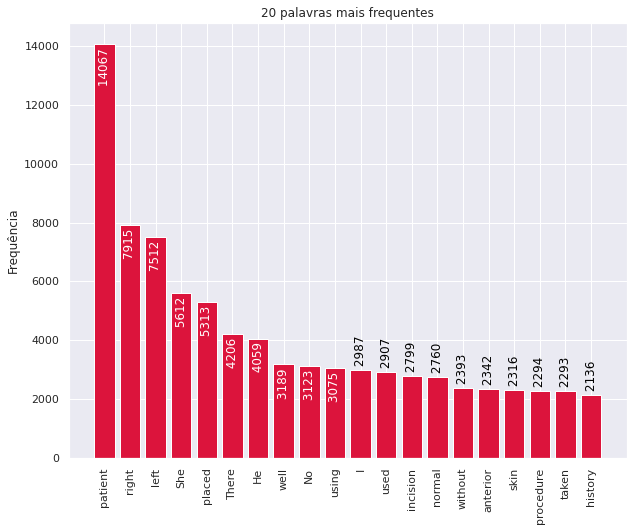

In [ ]:
from matplotlib import pyplot as plt

y = [count for tag, count in most[:20]]
x = [tag for tag, count in most[:20]]

plt.figure(figsize=(10,8))
plt.bar(x, y, color='crimson')
plt.title("20 palavras mais frequentes")
plt.ylabel("Frequência")

plt.xticks(rotation=90)
for i, (tag, count) in enumerate(most[:20]):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
#plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
#plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

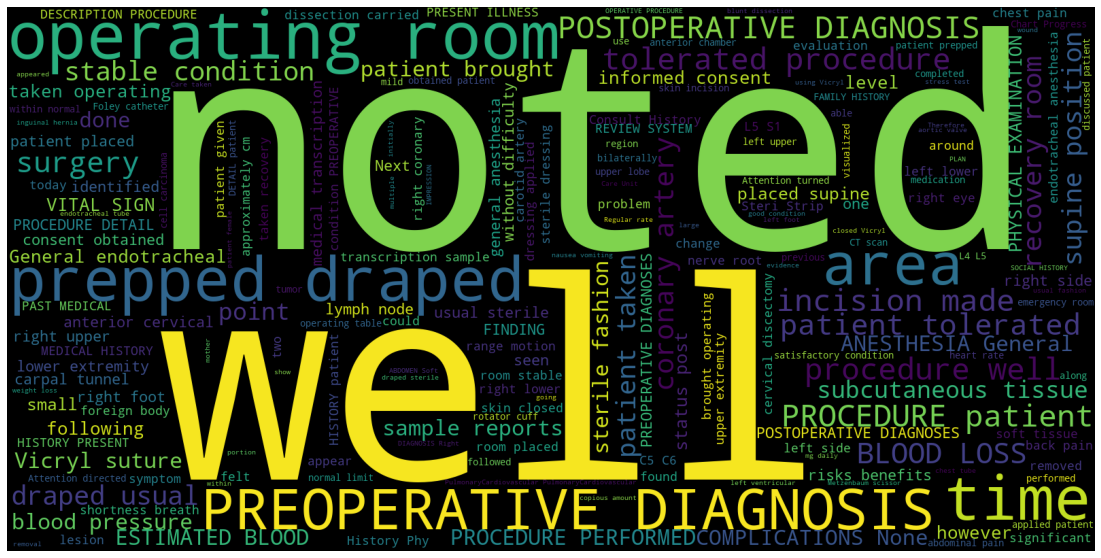

In [ ]:
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1600, height=800).generate(palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

###Usando a quantidade de palavras-chave similares. Quais casos estão relacionados entre eles. Imagina caso 3 ter palavras chaves: bariátrica, laparoscopia, sangue, o caso 17: urologia, sangue, prostata, o caso 100: bariatrica, bypass gástrico, laparoscópica gastrica, coração, sangue. Observe que caso 100 e o caso 3 se relacionam em 3 palavras.

In [ ]:
short = amostras_sem_faltantes.drop(['sample_name','medical_specialty','description','transcription'],axis=1)
short

,Unnamed: 0,keywords
0,0,"allergy / immunology, allergic rhinitis, aller..."
1,1,"bariatrics, laparoscopic gastric bypass, weigh..."
2,2,"bariatrics, laparoscopic gastric bypass, heart..."
3,3,"cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...
4984,4984,"bariatrics, laparoscopic gastric bypass, gastr..."
4985,4985,"bariatrics, jenny craig, medifast, nutrisystem..."
4989,4989,"bariatrics, elective surgical weight loss, sur..."
4993,4993,"allergy / immunology, chronic glossitis, xeros..."


In [ ]:
short.groupby(['keywords']).count()

,Unnamed: 0
keywords,
"allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,",1
"allergy / immunology, chronic glossitis, xerostomia, probable environmental inhalant allergies, probable food allergies, environmental inhalant allergies, rast allergy testing, rast, inhalant, food, allergy",1
"allergy / immunology, mucous membranes, conjunctivitis, ad lib, kawasaki disease, vaccine, fever, aspirin",1
"bariatrics, breast reconstruction, excess, lma anesthesia, lipodystrophy, liposuction, abdomen, drain site, flank, latissimus dorsi flap, soft tissue, supraumbilical, surgical bra, supraumbilical abdomen, reconstruction, breast, tissue, implant,",1
"bariatrics, elective surgical weight loss, surgical weight loss, weight loss, lap band, gastric bypass, loss, weight, lap, band, lost, gained, diabetes, gastric, bypass, overweight, surgical",1
...,...
"urology, urinary retention, transurethral resection of prostate, prostate, enlarged, obstructive voiding symptoms, benign prostate hypertrophy, ureteral orifices, prostate hypertrophy, cystourethroscopy, turp, hypertrophy, resectoscope, urinary, bladder, resection,",1
"urology, urinary tract infection, escherichia coli, prophylactic macrodantin, e. coli, infection,",1
"urology, vas, contralateral, desire for sterility, scalpel, sterility, vasectomy",1


Nessa situação, o ideal seria fazer uma correlação das palavras, como um heatmap, por exemplo. Mas para isso seria melhor que cada caso tivesse aproximadamento o mesmo número de keywords e também que a coluna keywords estivesse padronizada para que cada item fosse apenas termos e não como está, onde em alguns casos contém frases e até textos por inteiro.

No cenário em que as Keywords contém apenas palavras ou termos separados por vírgula, poderíamos transforma-los em listas e assim podemos comparar os casos  dois a dois (sobre o conteúdo dessas listas). Estas comparações seriam transformadas em Scores de similaridade o que nos diria os locais com maior score.

Como por exemplo:

In [ ]:
a = short['keywords'][0].split(', ')

In [ ]:
a

['allergy / immunology',
 'allergic rhinitis',
 'allergies',
 'asthma',
 'nasal sprays',
 'rhinitis',
 'nasal',
 'erythematous',
 'allegra',
 'sprays',
 'allergic,']

In [ ]:
b = short['keywords'][1].split(', ')

In [ ]:
counterA = Counter(a)
counterB = Counter(b)

In [ ]:
counterA

Counter({'allegra': 1,
         'allergic rhinitis': 1,
         'allergic,': 1,
         'allergies': 1,
         'allergy / immunology': 1,
         'asthma': 1,
         'erythematous': 1,
         'nasal': 1,
         'nasal sprays': 1,
         'rhinitis': 1,
         'sprays': 1})

In [ ]:
counterB

Counter({"atkin's diet": 1,
         'band': 1,
         'bariatrics': 1,
         'body weight': 1,
         'diets': 1,
         'gastric bypass': 1,
         'laparoscopic': 1,
         'laparoscopic gastric': 1,
         'laparoscopic gastric bypass': 1,
         'loss': 1,
         'lost': 1,
         'months': 1,
         'overweight': 1,
         'pounds': 1,
         'weight': 1,
         'weight loss': 1,
         'weight loss programs': 1,
         "weight watcher's": 1})

In [ ]:
import math


def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

def length_similarity(c1, c2):
    lenc1 = sum(c1.itervalues())
    lenc2 = sum(c2.itervalues())
    return min(lenc1, lenc2) / float(max(lenc1, lenc2))

def similarity_score(l1, l2):
    c1, c2 = Counter(l1), Counter(l2)
    return length_similarity(c1, c2) * counter_cosine_similarity(c1, c2)

In [ ]:
counter_cosine_similarity(counterA,counterB)

0.0

Isso porque as duas primeiras linhas tem um score baixo de correlação.
Vendo outras linhas com mais similaridades:

In [ ]:
c = short['keywords'][3].split(', ')
d = short['keywords'][4].split(', ')
counterC = Counter(c)
counterD = Counter(d)

In [ ]:
counter_cosine_similarity(counterC,counterD)

0.4

Outra forma seria colorir cada palavra/termo com uma cor diferente e através da similaridade das linhas (visualmente) identificar os casos mais correlacionados entre si

###Identificou alguma outra informação importante para nos apresentar além do solicitado?

In [ ]:
mulheres = amostras_sem_faltantes[amostras_sem_faltantes['description'].str.contains('female') | amostras_sem_faltantes['description'].str.contains('she') |amostras_sem_faltantes['description'].str.contains('She')]

In [ ]:
len(mulheres)

290

In [ ]:
homens = amostras_sem_faltantes[amostras_sem_faltantes['description'].str.contains('male') | amostras_sem_faltantes['description'].str.contains('he') |amostras_sem_faltantes['description'].str.contains('He')]

In [ ]:
len(homens)

2233

In [ ]:
len(amostras_sem_faltantes)

3813

In [ ]:
surgery = amostras_sem_faltantes.query('medical_specialty == "Cosmetic / Plastic Surgery" | medical_specialty == "Bariatrics"|medical_specialty == "Neurosurgery" | medical_specialty == "Surgery"')

In [ ]:
mulherc =surgery[surgery['description'].str.contains('female') | surgery['description'].str.contains('she') |surgery['description'].str.contains('She')]

In [ ]:
homemc =surgery[surgery['description'].str.contains('male') | surgery['description'].str.contains('he') |surgery['description'].str.contains('He')]

In [ ]:
proporcao_mulheres = (len(mulheres)*100)/len(amostras_sem_faltantes)
proporcao_mulheres

7.6055599265670075

In [ ]:
proporcao_homens = (len(homens)*100)/len(amostras_sem_faltantes)
proporcao_homens

58.56281143456596

In [ ]:
proporcao_mulheresc = (len(mulherc)*100)/len(mulheres)
proporcao_mulheres

7.6055599265670075

In [ ]:
proporcao_homens = (len(homemc)*100)/len(homens)
proporcao_homens

29.511867442901927

Do total de 3813 casos, apenas 2523 tem alguma descrição que permite identificar o sexo do indivíduo/paciente.

Destes, 290 são mulheres e 2233 são homens.

De 290 casos de mulheres, 7,6% delas estavam em procedimentos que envolveu cirurgia, enquanto que dos 2233 casos de homens, 29,5% deles estavam em procedimentos que envolveu cirurgia.